In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Loading the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns= iris.feature_names)

In [4]:
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Applying the elbow method to Find optimal number of Cluster
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

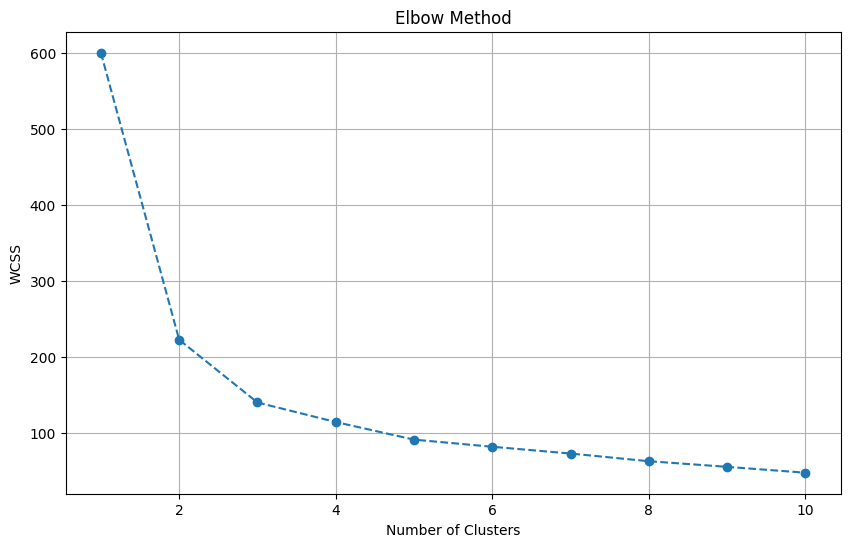

In [6]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
# From the elbow plot, let's assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [8]:
# Add the cluster labels to the original dataset
X['Cluster'] = clusters

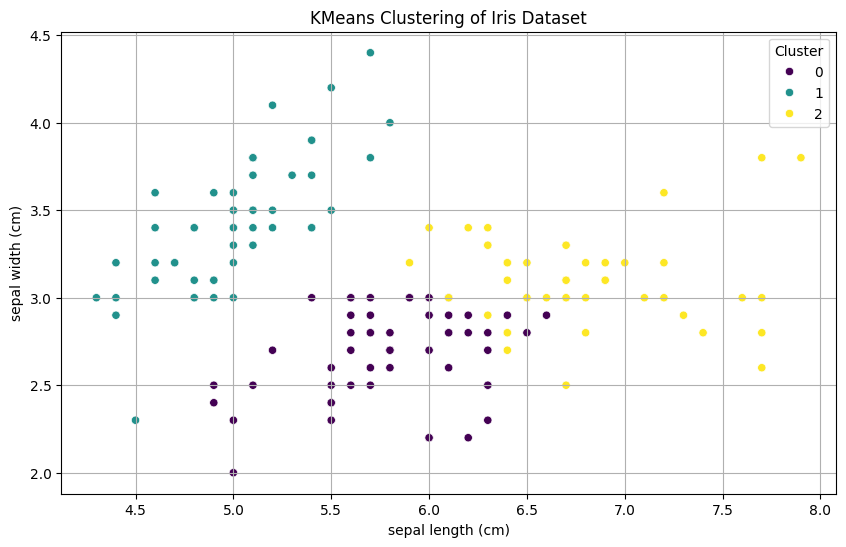

In [9]:
# Visualize the clusters with scatter plots
# We will use only the first two features for a 2D plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=X['Cluster'], palette='viridis')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

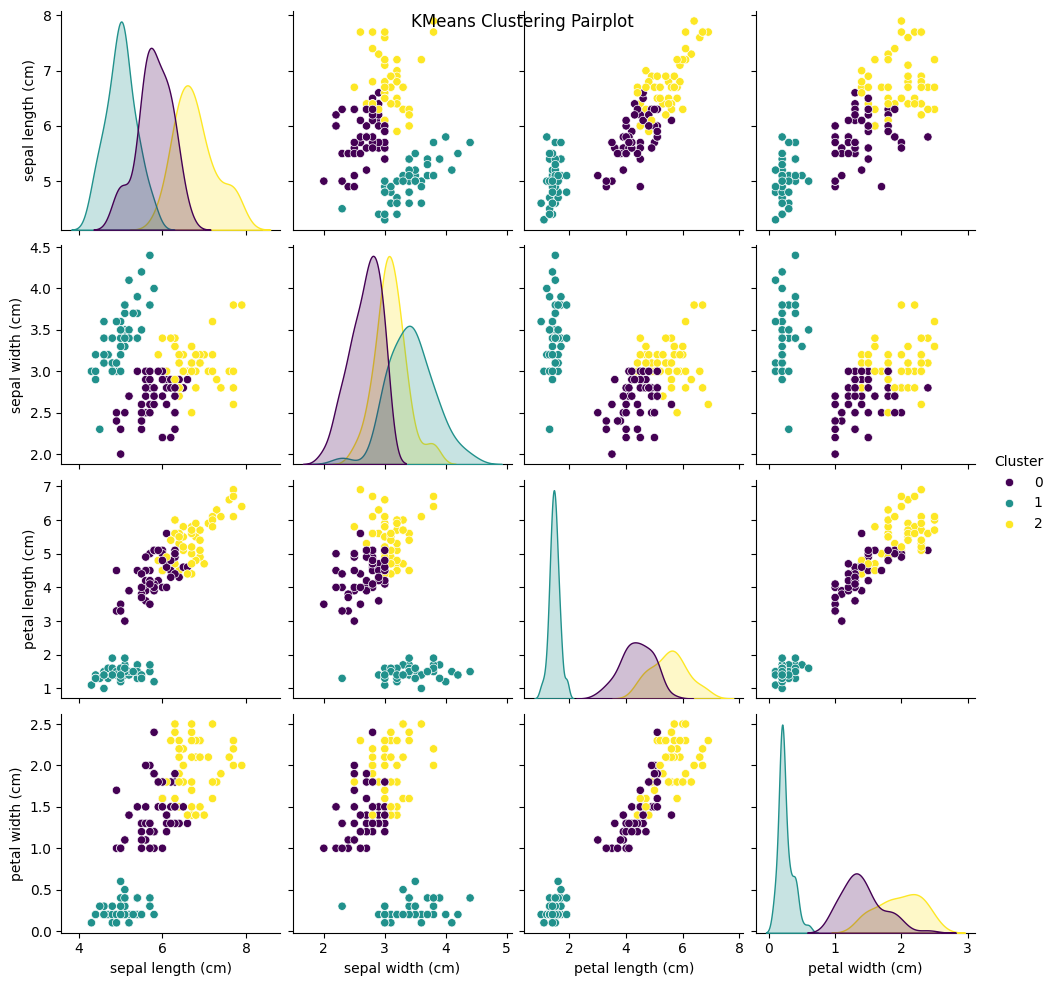

In [10]:
# Visualize the clusters using pairplot for a more detailed view
sns.pairplot(X, hue='Cluster', palette='viridis')
plt.suptitle('KMeans Clustering Pairplot')
plt.show()